In [39]:
import pandas as pd

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset005_LA_CT00_corrected_voted_region/labelsTr/patients_history_percentage_opa_correlation_study.csv', index_col='Unnamed: 0')
df = df[~df['Dice'].isna()]
df = df[~df['Opa_percentage'].isna()]

df['Dice'].mean()

0.9391829164250208

In [42]:
df.loc[df['ID']==128,'LAA_opacification_defect'] = 1
# In the clinical data was not an LAA_opacification_defect, but as for Hubert it is.

In [43]:
df

,ID,Stroke_ait_history,peripheral_embolism_hist,embolism_hist,verified_thrombus,LAA_opacification_defect,Dice,IoU,nnUnet_id,Opa_percentage,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,vol_auricle_ref,vol_opa_ref,real_vol_auricle_ref,real_vol_opa_ref
Unnamed: 0,,,,,,,,,,,,,,,,,
0,6,1,0,1,0,0,0.902653,0.822578,0.0,14.845918,0.455078,0.455078,0.400024,167898.0,24926.0,13909.257291,2064.956981
1,7,1,0,1,0,1,0.908900,0.833013,1.0,53.393807,0.421875,0.421875,0.400024,181787.0,97063.0,12942.462065,6910.473221
2,8,0,0,0,0,0,0.963089,0.928806,2.0,1.530771,0.410156,0.410156,0.400024,80221.0,1228.0,5398.501628,82.638711
3,9,1,0,1,0,1,0.980152,0.961077,3.0,1.821576,0.496094,0.496094,0.400024,210532.0,3835.0,20726.793721,377.554262
5,13,0,0,0,0,0,0.950502,0.905673,4.0,3.413421,0.576172,0.576172,0.400024,43036.0,1469.0,5715.082534,195.079846
6,14,1,0,1,0,1,0.969161,0.940168,5.0,19.674916,0.531250,0.531250,0.400024,133627.0,26291.0,15086.156277,2968.188575
7,16,0,0,0,0,0,0.976274,0.953648,6.0,8.937718,0.451172,0.451172,0.400002,189959.0,16978.0,15466.981302,1382.395193
8,17,0,0,0,0,1,0.965133,0.932615,7.0,66.411254,0.451172,0.451172,0.400002,241831.0,160603.0,19690.541408,13076.735496
9,20,0,0,0,0,0,0.962635,0.927961,8.0,2.451857,0.486328,0.486328,0.400002,154903.0,3798.0,14654.811920,359.315027


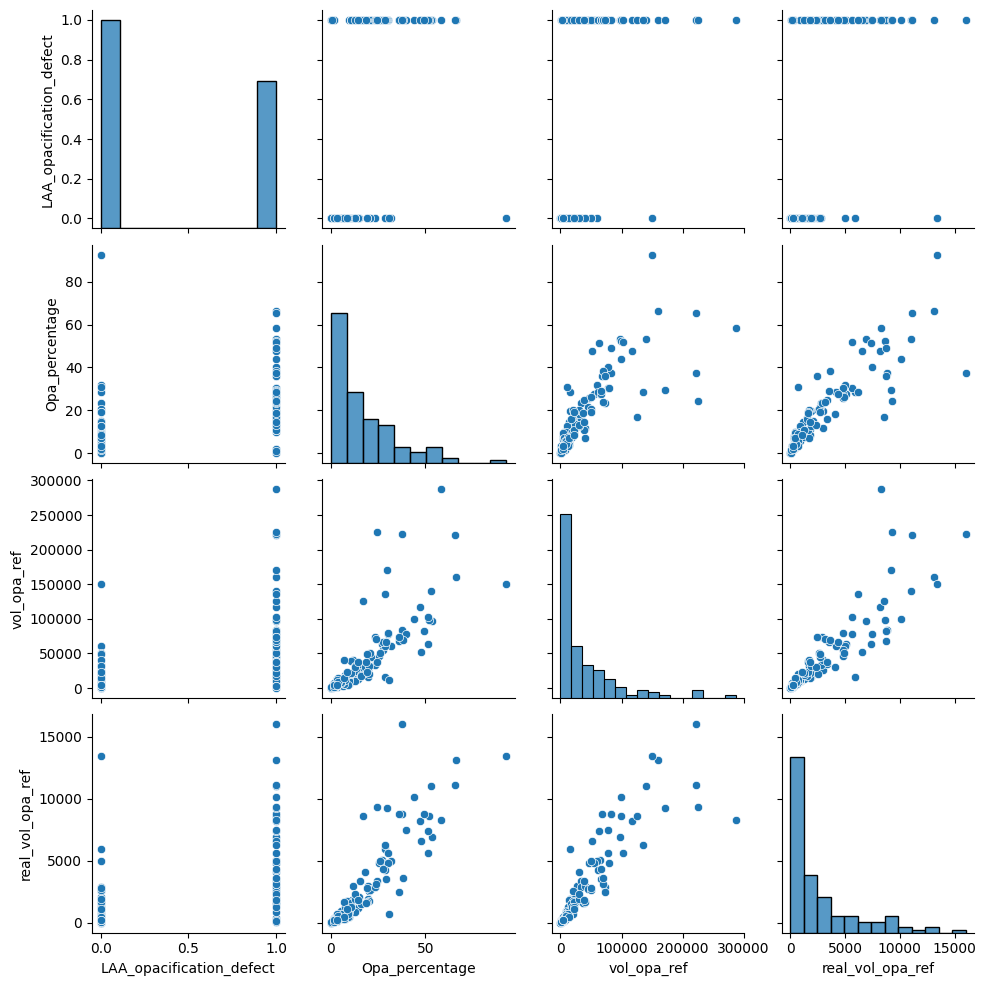

In [44]:
sns.pairplot(df[['LAA_opacification_defect', 'Opa_percentage', 'vol_opa_ref', 'real_vol_opa_ref']])

## Comparison between roc curve from:
## 1) LAA_opacification_defect and Opa_percentage AND
## 2) LAA_opacification_defect and real_vol_opa_ref

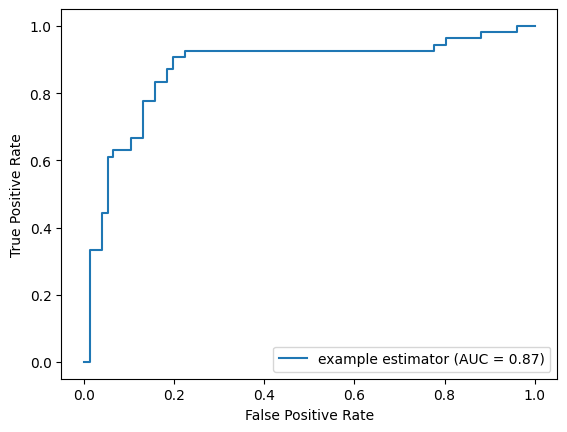

In [47]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['LAA_opacification_defect'], df['Opa_percentage'])
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')

display.plot()
plt.show()

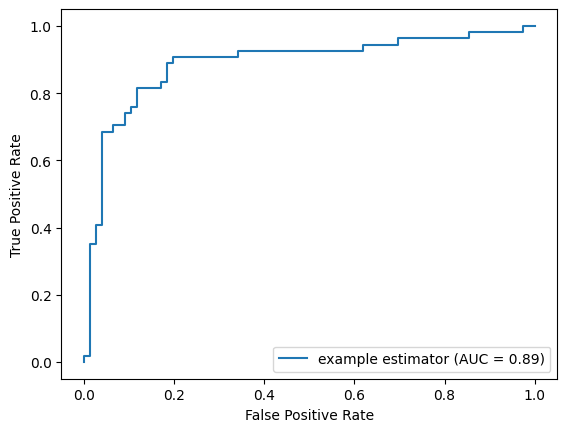

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(df['LAA_opacification_defect'], df['real_vol_opa_ref'])
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

The AUC from LAA_opacification_defect and real_vol_opa_ref is HIGHER (0.89 > 0.87)

In [80]:
from sklearn import feature_selection
import numpy as np
qui, p =feature_selection.chi2(np.array(df['Opa_percentage']).reshape(-1, 1), df['LAA_opacification_defect'])
p

array([2.04817119e-165])

In [81]:
qui, p =feature_selection.chi2(np.array(df['real_vol_opa_ref']).reshape(-1, 1), df['LAA_opacification_defect'])
p

array([0.])

The chi2 test shows indeed that the correlation between the real_vol_opa_ref and the LAA_opacification_defect is more significative.

## Choosing the right thersholds for the predictions with the real_vol_opa_ref

In [51]:
thresholds_df = pd.DataFrame({'thresholds':thresholds, 'fpr':fpr, 'tpr':tpr})
thresholds_df

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,1.600589e+04,0.000000,0.018519
2,1.343374e+04,0.013158,0.018519
3,6.222395e+03,0.013158,0.351852
4,5.915926e+03,0.026316,0.351852
5,5.087143e+03,0.026316,0.407407
6,4.985335e+03,0.039474,0.407407
7,2.871911e+03,0.039474,0.685185
8,2.753849e+03,0.065789,0.685185
9,2.722478e+03,0.065789,0.703704


<Axes: xlabel='thresholds'>

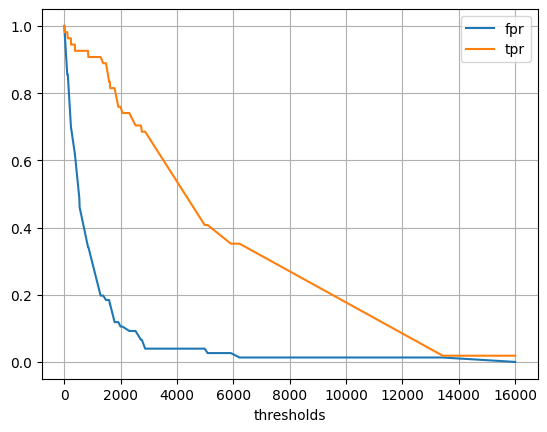

In [19]:
thresholds_df.set_index('thresholds').plot(grid=True)

I am using the formula from this paper to define the optimal thresholds from the ROC curve https://pubmed.ncbi.nlm.nih.gov/28642804/

In [52]:
thresholds_df['tnr'] = 1 - thresholds_df['fpr']

In [53]:
thresholds_df['IU'] = abs(thresholds_df['tpr'] - roc_auc) + abs(thresholds_df['tnr'] - roc_auc)

In [57]:
thresholds_df

,thresholds,fpr,tpr,tnr,IU
0,inf,0.000000,0.000000,1.000000,1.000000
1,1.600589e+04,0.000000,0.018519,1.000000,0.981481
2,1.343374e+04,0.013158,0.018519,0.986842,0.968324
3,6.222395e+03,0.013158,0.351852,0.986842,0.634990
4,5.915926e+03,0.026316,0.351852,0.973684,0.621832
5,5.087143e+03,0.026316,0.407407,0.973684,0.566277
6,4.985335e+03,0.039474,0.407407,0.960526,0.553119
7,2.871911e+03,0.039474,0.685185,0.960526,0.275341
8,2.753849e+03,0.065789,0.685185,0.934211,0.249025
9,2.722478e+03,0.065789,0.703704,0.934211,0.230507


<AxesSubplot:xlabel='thresholds'>

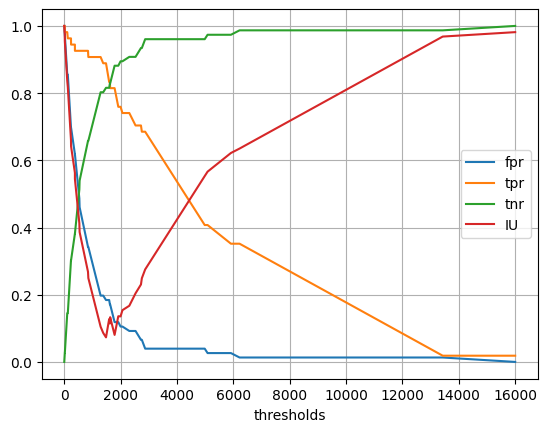

In [55]:
thresholds_df.set_index('thresholds').plot(grid=True)

In [59]:
thresholds_df[thresholds_df['IU'] == thresholds_df['IU'].min()]

,thresholds,fpr,tpr,tnr,IU
19,1481.679062,0.184211,0.888889,0.815789,0.073099


The optimal thresholds is around 1481.

In [60]:
df['thresholds_1481'] = (df['real_vol_opa_ref'] > 1481).astype(int)

We create a column with the opacification defects label from the threholds equal to 1481.

In [61]:
df[['LAA_opacification_defect', 'thresholds_1481']]

,LAA_opacification_defect,thresholds_1481
Unnamed: 0,,
0,0,1
1,1,1
2,0,0
3,1,0
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


In [62]:
df[df['LAA_opacification_defect'] != df['thresholds_1481']].shape

(20, 18)

In [63]:
df.shape

(130, 18)

In [65]:
1 - df[df['LAA_opacification_defect'] != df['thresholds_1481']].shape[0]/df.shape[0]

0.8461538461538461

Just by using this thresholds, the accuracy is equal to 84.61%.

In [24]:
df.to_csv('/media/sharedata/atriumCT/atrium_nnunet/raw_data/Dataset005_LA_CT00_corrected_voted_region/labelsTr/patients_history_percentage_opa_correlation_study_thresholds.csv', index=False  )

In [66]:
df2 = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset006_LA_CT00_region_fenetrage/nnUNetTrainer__nnUNetPlans_Dataset002__3d_fullres_classic_loss/fold_0/toulouse_prediction/patients_history_percentage_opa_correlation_study.csv')
df2['thresholds_1481'] = (df2['real_vol_opa_ref'] > 1481).astype(int)
# Computing the predictions with thresholds on the Toulouse dataset.

In [32]:
df2.to_csv('/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset006_LA_CT00_region_fenetrage/nnUNetTrainer__nnUNetPlans_Dataset002__3d_fullres_classic_loss/fold_0/toulouse_prediction/patients_history_percentage_opa_correlation_study_thresholds.csv', index=False)


In [69]:
df_bdx_comp = pd.read_csv('/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset006_LA_CT00_region_fenetrage/nnUNetTrainer__nnUNetPlans_Dataset002__3d_fullres_classic_loss/fold_0/bordeaux_complementaire_prediction/patients_history_percentage_opa_correlation_study_bordeaux_complementaire.csv')

In [70]:
df_bdx_comp.set_index('ID', inplace=True)

### Percentages comparisons

In [9]:
df2['thresholds_1481'].mean()

0.3575418994413408

Average prediction of opacification defects on the Toulouse dataset.

In [30]:
df['thresholds_1481'].mean()

0.47692307692307695

Average "prediction" of opacification defects on the Bordeaux dataset (this dataset was used to establish the thresholds).

In [31]:
df[['LAA_opacification_defect']].mean()

LAA_opacification_defect    0.415385
dtype: float64

Percentage of actual opacification defects on the Bordeaux dataset (this dataset was used to establish the thresholds).

In [71]:
df_bdx_comp['thresholds_1481'].mean()

0.3923076923076923

Average prediction of opacification defects on the Bordeaux dataset that was NOT USED for thersholds establishment.

In [72]:
df_clinique = pd.read_csv('/media/DATA/Toulouse/mix_donnes_predites_GT/Clinical_info_image.csv', sep=';', index_col='pid')
print(df_clinique.shape)
df_clinique.head()


(321, 9)


,Stroke/AIT history,peripheral embolism history,embolism history,LAA Thrombus (LAA defect of opacification on venous phase),LAA defect of opacification onarterial phase,Contrast stagnation on venous phasein the LAA,Acquisition modality,prospective acquisition =1,Systolic =1
pid,,,,,,,,,
1,0,0,0,pas de temps veineux,0.0,pas de temps veineux,diastoele 73 %,0,0.0
2,1,0,1,pas de temps veineux,0.0,pas de temps veineux,35%,0,1.0
3,1,0,1,pas de temps veineux,0.0,pas de temps veineux,77%,0,0.0
4,1,0,1,pas de temps veineux,0.0,pas de temps veineux,diastole 73%,0,0.0
5,0,0,0,pas de temps veineux,0.0,pas de temps veineux,83%,0,0.0


In [73]:
df_joined = df_bdx_comp.join(df_clinique)
df_joined

,Opa_percentage,Spacing_ref_0,Spacing_ref_1,Spacing_ref_2,vol_auricle_ref,vol_opa_ref,real_vol_auricle_ref,real_vol_opa_ref,thresholds_1481,Stroke/AIT history,peripheral embolism history,embolism history,LAA Thrombus (LAA defect of opacification on venous phase),LAA defect of opacification onarterial phase,Contrast stagnation on venous phasein the LAA,Acquisition modality,prospective acquisition =1,Systolic =1
ID,,,,,,,,,,,,,,,,,,
101,19.152173,0.458984,0.458984,0.500000,98605.0,18885.0,10386.392832,1989.219904,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,5.386154,0.699219,0.699219,0.400024,20497.0,1104.0,4008.694223,215.914447,0,1,0,1,pas de temps veineux,0.0,pas de temps veineux,70%,0,0.0
114,5.930199,0.421875,0.421875,0.500000,226586.0,13437.0,20163.719971,1195.748657,0,0,1,1,0,1.0,1,354ms,1,1.0
117,79.598645,0.439453,0.439453,0.500000,39267.0,31256.0,3791.602850,3018.064499,1,0,1,1,0,0.0,0,68%,0,0.0
119,42.248076,0.462891,0.462891,0.500000,169932.0,71793.0,18205.472008,7691.461596,1,0,0,0,0,1.0,0,75%,0,0.0
121,2.566085,0.353516,0.353516,0.500000,152606.0,3916.0,9535.837490,244.697716,0,0,0,0,0,0.0,0,700ms,1,0.0
122,23.897705,0.367188,0.367188,0.500000,81920.0,19577.0,5522.500000,1319.750763,0,0,0,0,0,1.0,1,595ms,1,0.0
124,30.746098,0.445312,0.445312,0.500000,165930.0,51017.0,16452.226868,5058.417755,1,0,0,0,0,1.0,0,79%,0,0.0
127,13.167640,0.435547,0.435547,0.500000,88034.0,11592.0,8350.072453,1099.507462,0,0,0,0,0,0.0,0,68%,0,0.0


In [74]:
df_joined.to_csv('/media/sharedata/atriumCT/atrium_nnunet/nnUNet_results/Dataset006_LA_CT00_region_fenetrage/nnUNetTrainer__nnUNetPlans_Dataset002__3d_fullres_classic_loss/fold_0/bordeaux_complementaire_prediction/patients_history_percentage_opa_correlation_study_bordeaux_complementaire_with_clinical_info.csv')

In [76]:
df_joined = df_joined[~df_joined['LAA defect of opacification onarterial phase'].isna()]

In [77]:
df_joined.shape

(129, 18)

In [78]:
df_joined[df_joined['LAA defect of opacification onarterial phase'] != df_joined['thresholds_1481']].shape

(18, 18)

### Accuracy of the prediction with thresholds

In [79]:
1 - df_joined[df_joined['LAA defect of opacification onarterial phase'] != df_joined['thresholds_1481']].shape[0]/df_joined.shape[0]

0.8604651162790697

Accuracy of the prediction with thresholds 

### Percentage of ACTUAL opacification defects on the dataset on the Bordeaux dataset that was NOT USED for thersholds establishment

In [31]:
df_joined['LAA defect of opacification onarterial phase'].mean()

0.4186046511627907

### Percentage of opacification defects PREDICTIONS BY THRESHOLDS on the dataset

In [32]:
df_joined['thresholds_1481'].mean()

0.3875968992248062